# Homework #3

## Dataset

In this homework, we will use Course Management Platform lead scoring dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv).

In [1]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv')
data.shape

(1462, 9)

In [3]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1334 non-null   str    
 1   industry                  1328 non-null   str    
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1281 non-null   float64
 4   employment_status         1362 non-null   str    
 5   location                  1399 non-null   str    
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), str(4)
memory usage: 102.9 KB


In [4]:
data.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [5]:
data.nunique()

lead_source                    5
industry                       7
number_of_courses_viewed      10
annual_income               1267
employment_status              4
location                       7
interaction_count             12
lead_score                   101
converted                      2
dtype: int64

In [6]:
data.isna().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

## Question 1

What is the most frequent observation (mode) for the column `industry`?

In [7]:
data.describe(include=["O"])

C:\Users\Felsteed\AppData\Local\Temp\ipykernel_3448\2860476095.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  data.describe(include=["O"])


,lead_source,industry,employment_status,location
count,1334,1328,1362,1399
unique,5,7,4,7
top,organic_search,retail,self_employed,north_america
freq,282,203,352,225


In [8]:
data['industry'].value_counts()

industry
retail           203
finance          200
other            198
healthcare       187
education        187
technology       179
manufacturing    174
Name: count, dtype: int64

## Question 2

* Create the correlation matrix for the numerical features of your dataset
* In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset
* What are the two features that have the biggest correlation in this dataset?

In [9]:
data_numeric = data.copy()
data_numeric = data.drop(
    ['lead_source', 'industry', 'employment_status', 'location', 'converted'],
    axis=1
)
data_numeric.describe()

,number_of_courses_viewed,annual_income,interaction_count,lead_score
count,1462.000000,1281.000000,1462.000000,1462.000000
mean,2.031464,59886.273224,2.976744,0.506108
std,1.449717,15070.140389,1.681564,0.288465
min,0.000000,13929.000000,0.000000,0.000000
25%,1.000000,49698.000000,2.000000,0.262500
50%,2.000000,60148.000000,3.000000,0.510000
75%,3.000000,69639.000000,4.000000,0.750000
max,9.000000,109899.000000,11.000000,1.000000


In [10]:
data_numeric.corr()

,number_of_courses_viewed,annual_income,interaction_count,lead_score
number_of_courses_viewed,1.000000,0.031551,-0.023565,-0.004879
annual_income,0.031551,1.000000,0.048618,0.005334
interaction_count,-0.023565,0.048618,1.000000,0.009888
lead_score,-0.004879,0.005334,0.009888,1.000000


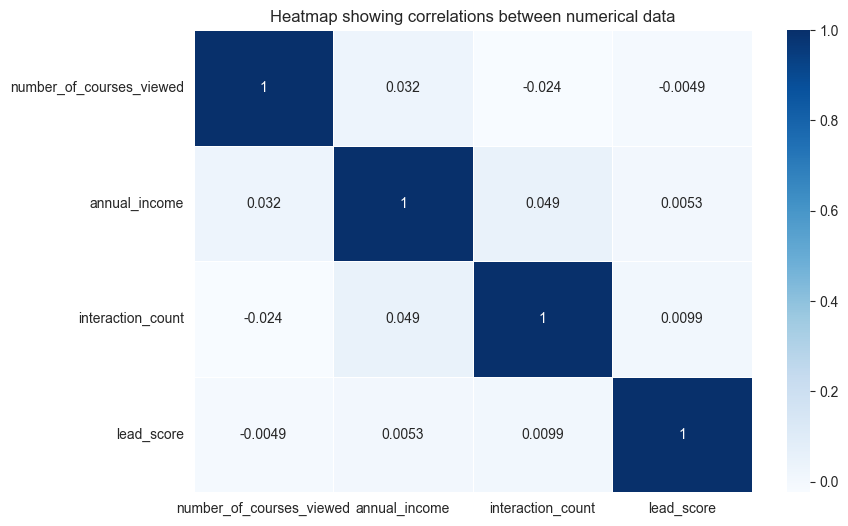

In [11]:
plt.figure(figsize=(9, 6))
sns.heatmap(data_numeric.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [12]:
data_numeric.corr().unstack().sort_values(ascending=False)

number_of_courses_viewed  number_of_courses_viewed    1.000000
annual_income             annual_income               1.000000
lead_score                lead_score                  1.000000
interaction_count         interaction_count           1.000000
annual_income             interaction_count           0.048618
interaction_count         annual_income               0.048618
annual_income             number_of_courses_viewed    0.031551
number_of_courses_viewed  annual_income               0.031551
lead_score                interaction_count           0.009888
interaction_count         lead_score                  0.009888
annual_income             lead_score                  0.005334
lead_score                annual_income               0.005334
                          number_of_courses_viewed   -0.004879
number_of_courses_viewed  lead_score                 -0.004879
                          interaction_count          -0.023565
interaction_count         number_of_courses_viewed   -0

`number_of_courses_viewed` and `interaction_count`

## Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`
* Make sure that the target value `y` is not in your dataframe

In [13]:
SEED = 42

In [14]:
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=SEED)

assert len(data) == (len(df_train) + len(df_val) + len(df_test))

In [15]:
len(df_train), len(df_val), len(df_test)

(876, 293, 293)

In [16]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [17]:
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

## Question 3

* Calculate the mutual information score between `y` and other categorical variables in the dataset. Use the training set only
* Round the scores to 2 decimals using `round(score, 2)`
* Which of these variables has the biggest score?

In [18]:
def calculate_mi(series):
    return mutual_info_score(series, df_train.converted)

In [19]:
cat = ['lead_source', 'industry', 'employment_status', 'location']
numeric = ['number_of_courses_viewed', 'annual_income', 'interaction_count',
       'lead_score']

In [20]:
df_mi = df_train[cat].fillna('NA').apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
lead_source,0.035396
employment_status,0.012938
industry,0.011575
location,0.004464


`lead_source` has the biggest score.

In [21]:
df_train = df_train.drop('converted', axis=1)
df_val = df_val.drop('converted', axis=1)
df_test = df_test.drop('converted', axis=1)

assert 'converted' not in df_train.columns
assert 'converted' not in df_val.columns
assert 'converted' not in df_test.columns

## Question 4

* Now let's train a logistic regression
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding
* Fit the model on the training dataset:
    * To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:

```
model = LogisticRegression(
    C=1.0,
    max_iter=1000,
    random_state=42
)
```
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits

In [36]:
df_train[cat] = df_train[cat].fillna('NA')
df_train[numeric] = df_train[numeric].fillna(0)

dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
X_train

array([[5.8472e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [7.1738e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        3.0000e+00],
       [8.1973e+04, 0.0000e+00, 1.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        3.0000e+00],
       ...,
       [8.9042e+04, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        3.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [5.0259e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+00]], shape=(876, 31))

In [37]:
dv.get_feature_names_out()

array(['annual_income', 'employment_status=NA',
       'employment_status=employed', 'employment_status=self_employed',
       'employment_status=student', 'employment_status=unemployed',
       'industry=NA', 'industry=education', 'industry=finance',
       'industry=healthcare', 'industry=manufacturing', 'industry=other',
       'industry=retail', 'industry=technology', 'interaction_count',
       'lead_score', 'lead_source=NA', 'lead_source=events',
       'lead_source=organic_search', 'lead_source=paid_ads',
       'lead_source=referral', 'lead_source=social_media', 'location=NA',
       'location=africa', 'location=asia', 'location=australia',
       'location=europe', 'location=middle_east',
       'location=north_america', 'location=south_america',
       'number_of_courses_viewed'], dtype=object)

In [40]:
y_train

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,

In [23]:
model = LogisticRegression(
    C=1.0,
    max_iter=1000,
    random_state=42
)
model.fit(X_train, y_train)

D:\PyProjects\machine-learning-zoomcamp\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

In [39]:
df_val[cat] = df_val[cat].fillna('NA')
df_val[numeric] = df_val[numeric].fillna(0)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)
y_pred

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0])

In [43]:
model.intercept_[0].round(3) # biased

np.float64(-4.473)

In [42]:
model.coef_[0].round(3) # weights of features

array([ 0.   , -1.102,  0.244, -0.526, -0.649, -2.419, -0.901,  0.764,
       -0.642, -0.876, -0.495, -0.673, -1.095, -0.537,  1.18 ,  3.709,
       -0.195, -0.851, -0.829, -2.436,  1.131, -1.273, -0.163, -0.988,
       -0.765, -0.625, -0.234, -0.298, -0.724, -0.656,  1.599])

In [41]:
X_val

array([[5.2220e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        3.0000e+00],
       [5.9656e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        3.0000e+00],
       [5.7134e+04, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [7.4166e+04, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        1.0000e+00],
       [3.9103e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+00],
       [4.7129e+04, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        1.0000e+00]], shape=(293, 31))

In [38]:
X_val

array([[5.2220e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        3.0000e+00],
       [5.9656e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        3.0000e+00],
       [5.7134e+04, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [7.4166e+04, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        1.0000e+00],
       [3.9103e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+00],
       [4.7129e+04, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        1.0000e+00]], shape=(293, 31))

In [25]:
original_score = accuracy_score(y_val, y_pred)
original_score

0.8532423208191127

In [26]:
accuracy = np.round(original_score, 2)
print(f'Accuracy = {accuracy}')

Accuracy = 0.85


## Question 5

* Let's find the least useful feature using the _feature elimination_ technique
* Train a model with all these features (using the same parameters as in Q4)
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature
* Which of following feature has the smallest difference?
    - 'industry',
    - 'employment_status',
    - 'lead_score'
* Round your answer to 2 decimal digits
    
> **note:** the difference doesn't have to be positive

In [27]:
features = df_train.columns.to_list()
eliminate = [
 'industry',
 'employment_status',
 'lead_score']

In [28]:
scores = pd.DataFrame(columns=['eliminated_feature', 'accuracy', 'difference'])
for feature in eliminate:
    subset = features.copy()
    subset.remove(feature)
    
    dv = DictVectorizer(sparse=False)
    train_dict = df_train[subset].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(
        C=1,
        max_iter=1000,
        random_state=42
    )
    model.fit(X_train, y_train)
    
    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    
    scores.loc[len(scores)] = [feature, score, original_score - score]

D:\PyProjects\machine-learning-zoomcamp\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\PyProjects\machine-learning-zoomcamp\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/st

In [29]:
scores

,eliminated_feature,accuracy,difference
0,industry,0.846416,0.006826
1,employment_status,0.832765,0.020478
2,lead_score,0.819113,0.034130


In [30]:
scores[scores.index == scores.difference.idxmin()]

,eliminated_feature,accuracy,difference
0,industry,0.846416,0.006826


industry (closely followed by employment_status)

## Question 6

* Now let's train a regularized logistic regression
* Let's try the following values of the parameter `C`: `[0, 0.01, 0.1, 1, 10]`
* Train models using all the features as in Q4
* Calculate the accuracy on the validation dataset and round it to 3 decimal digits
* Which of these `C` leads to the best accuracy on the validation set?
> **note:** If there are multiple options, select the smallest `C`.

In [31]:
y_train.shape, y_val.shape

((876,), (293,))

In [32]:
dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [33]:
scores = {}
for C in [0.01, 0.1, 1, 10, 100]:
    model = LogisticRegression(
        max_iter=1000,
        C=C,
        random_state=SEED
    )
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = accuracy_score(y_val, y_pred)
    scores[C] = round(score, 3)
    print(f'C = {C}:\t Accuracy = {score}')

C = 0.01:	 Accuracy = 0.8122866894197952
C = 0.1:	 Accuracy = 0.8430034129692833
C = 1:	 Accuracy = 0.8532423208191127


D:\PyProjects\machine-learning-zoomcamp\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\PyProjects\machine-learning-zoomcamp\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/st

C = 10:	 Accuracy = 0.8532423208191127
C = 100:	 Accuracy = 0.8532423208191127


In [34]:
scores

{0.01: 0.812, 0.1: 0.843, 1: 0.853, 10: 0.853, 100: 0.853}

In [35]:
print(f'The best `C` is {max(scores, key=scores.get)}.')

The best `C` is 1.
